# 2.06 Comparisons, Masks, and Boolean Logic

## Example: Counting Rainy Days

In [5]:

import numpy as np
import pandas as pd

# use pandas to extract rainfall inches as a NumPy array
rainfall = pd.read_csv('Seattle2014.csv')['PRCP'].values
print(rainfall, type(rainfall))

[  0  41  15   0   0   3 122  97  58  43 213  15   0   0   0   0   0   0
   0   0   0   5   0   0   0   0   0  89 216   0  23  20   0   0   0   0
   0   0  51   5 183 170  46  18  94 117 264 145 152  10  30  28  25  61
 130   3   0   0   0   5 191 107 165 467  30   0 323  43 188   0   0   5
  69  81 277   3   0   5   0   0   0   0   0  41  36   3 221 140   0   0
   0   0  25   0  46   0   0  46   0   0   0   0   0   0   5 109 185   0
 137   0  51 142  89 124   0  33  69   0   0   0   0   0 333 160  51   0
   0 137  20   5   0   0   0   0   0   0   0   0   0   0   0   0  38   0
  56   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
  18  64   0   5  36  13   0   8   3   0   0   0   0   0   0  18  23   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   3 193   0   0   0   0   0   0   0   0   0   5   0   0
   0   0   0   0   0   0   5 127 216   0  10   0   0   0   0   0   0   0
   0   0   0   0   0   0   0  84  13   0  30   0   

In [3]:
inches = rainfall / 254.0  # 1/10mm -> inches
inches.shape

(365,)

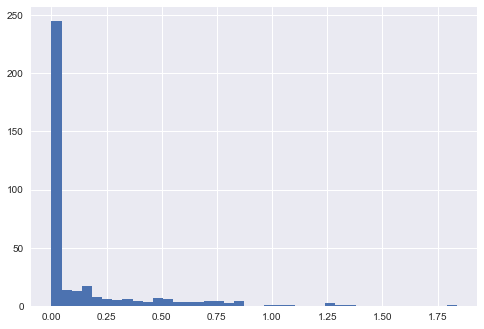

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()  # set plot styles

plt.hist(inches, 40);

## Comparison Operators as ufuncs

In [8]:
x = np.array([1, 2, 3, 4, 5])

In [9]:
x < 3  # less than

array([ True,  True, False, False, False], dtype=bool)

In [10]:
x > 3  # greater than

array([False, False, False,  True,  True], dtype=bool)

In [11]:
x <= 3  # less than or equal

array([ True,  True,  True, False, False], dtype=bool)

In [12]:
x >= 3  # greater than or equal

array([False, False,  True,  True,  True], dtype=bool)

In [13]:
x != 3  # not equal

array([ True,  True, False,  True,  True], dtype=bool)

In [14]:
x == 3  # equal

array([False, False,  True, False, False], dtype=bool)

In [15]:
x

array([1, 2, 3, 4, 5])

In [16]:

(2 * x) == (x ** 2)

array([False,  True, False, False, False], dtype=bool)

In [17]:

rng = np.random.RandomState(0)
x = rng.randint(10, size=(3, 4))
x

array([[5, 0, 3, 3],
       [7, 9, 3, 5],
       [2, 4, 7, 6]])

In [18]:
x < 6

array([[ True,  True,  True,  True],
       [False, False,  True,  True],
       [ True,  True, False, False]], dtype=bool)

## Working with Boolean Arrays

In [19]:
x

array([[5, 0, 3, 3],
       [7, 9, 3, 5],
       [2, 4, 7, 6]])

### Counting entries

In [20]:
# how many values less than 6?
np.count_nonzero(x < 6)

8

In [21]:
np.sum(x < 6)

8

In [22]:
# how many values less than 6 in each row?
np.sum(x < 6, axis=1)

array([4, 2, 2])

In [23]:
# are there any values greater than 8?
np.any(x > 8)

True

In [24]:
# are there any values less than zero?
np.any(x < 0)

False

In [25]:
# are all values less than 10?
np.all(x < 10)

True

In [26]:
# are all values equal to 6?
np.all(x == 6)

False

In [28]:
# are all values in each row less than 8?
x
np.all(x < 8, axis=1)

array([ True, False,  True], dtype=bool)

### Boolean operators

In [29]:
np.sum((inches > 0.5) & (inches < 1))

29

In [30]:
np.sum(~( (inches <= 0.5) | (inches >= 1) ))

29

In [31]:

print("Number days without rain:      ", np.sum(inches == 0))
print("Number days with rain:         ", np.sum(inches != 0))
print("Days with more than 0.5 inches:", np.sum(inches > 0.5))
print("Rainy days with < 0.2 inches  :", np.sum((inches > 0) &
                                                (inches < 0.2)))

Number days without rain:       215
Number days with rain:          150
Days with more than 0.5 inches: 37
Rainy days with < 0.2 inches  : 75


## Boolean Arrays as Masks

In [32]:
x

array([[5, 0, 3, 3],
       [7, 9, 3, 5],
       [2, 4, 7, 6]])

In [33]:
x < 5

array([[False,  True,  True,  True],
       [False, False,  True, False],
       [ True,  True, False, False]], dtype=bool)

In [34]:

x[x < 5]

array([0, 3, 3, 3, 2, 4])

In [36]:
# construct a mask of all rainy days
rainy = (inches > 0)

# construct a mask of all summer days (June 21st is the 172nd day)
days = np.arange(365)
summer = (days > 172) & (days < 262)

print("Median precip on rainy days in 2014 (inches):   ",
      np.median(inches[rainy]))
print("Median precip on summer days in 2014 (inches):  ",
      np.median(inches[summer]))
print("Maximum precip on summer days in 2014 (inches): ",
      np.max(inches[summer]))
print("Median precip on non-summer rainy days (inches):",
      np.median(inches[rainy & ~summer]))

Median precip on rainy days in 2014 (inches):    0.194881889764
Median precip on summer days in 2014 (inches):   0.0
Maximum precip on summer days in 2014 (inches):  0.850393700787
Median precip on non-summer rainy days (inches): 0.200787401575


## Aside: Using the Keywords and/or Versus the Operators &/|

In [38]:
bool(42), bool(0)

(True, False)

In [39]:
bool(42 and 0)

False

In [40]:
bool(42 or 0)

True

In [42]:

bin(42)

'0b101010'

In [47]:
bin(59)

'0b111011'

In [48]:
bin(42 | 59)

'0b111011'

In [49]:
bin(42 & 59)

'0b101010'

In [50]:
A = np.array([1, 0, 1, 0, 1, 0], dtype=bool)
B = np.array([1, 1, 1, 0, 1, 1], dtype=bool)
A | B

array([ True,  True,  True, False,  True,  True], dtype=bool)

In [51]:
A or B

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [53]:
x = np.arange(10)
(x > 4) & (x < 8)

array([False, False, False, False, False,  True,  True,  True, False, False], dtype=bool)